<a href="https://colab.research.google.com/github/luizcf14/Deforestation-TimeSeries-DL-Lecture/blob/master/LSTM_Create_Samples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create Samples for LSTM Training


## 1. Importing libraries

Reference for the libraries:

+ [numpy](https://numpy.org/install/)
+ [matplotlib](https://matplotlib.org/)
+ [tqdm](https://github.com/tqdm/tqdm)
+ [gdal](https://gdal.org/api/python.html)
+ [time](https://docs.python.org/3/library/time.html)
+ [os](https://docs.python.org/3/library/os.html)
+ [datetime](https://docs.python.org/3/library/datetime.html)

In [ ]:
!pip3 install stac.py
!pip3 install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 51 kB 264 kB/s 
  Created wheel for stac.py: filename=stac.py-0.9.0.post13-py3-none-any.whl size=49122 sha256=2495935b3117e54d5df5cd379e628cb8f67afe81b09fe2ea9b6b4fd04eb3d87e
  Stored in directory: /root/.cache/pip/wheels/1c/c1/a6/29a677fd6928583dcf4e4ed2b75b5d9ecd076e1e1e9cd67083
Successfully built stac.py
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 4.1 MB/s 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import gdal
import rasterio as r
import time
import os
import datetime
import stac
import glob
import subprocess

In [ ]:
service = stac.STAC('https://brazildatacube.dpi.inpe.br/stac/', access_token='cgfVcXCWpYA9tEzn0iBh8JNt88eX2P1NTyAiZsHG5p')
service


stac("https://brazildatacube.dpi.inpe.br/stac/")

In [ ]:
collection = service.collection('S2_L2A-1') # 'S2_10-1' for Sentinel
collection

name,common_name,min,max,nodata,scale,data_type
B01,coastal,0.0,10000.0,0.0,0.0001,int16
B02,blue,0.0,10000.0,0.0,0.0001,int16
B03,green,0.0,10000.0,0.0,0.0001,int16
B04,red,0.0,10000.0,0.0,0.0001,int16
B05,rededge,0.0,10000.0,0.0,0.0001,int16
B06,rededge,0.0,10000.0,0.0,0.0001,int16
Fmask4,quality,0.0,255.0,255.0,1.0,int16
B07,rededge,0.0,10000.0,0.0,0.0001,int16
B08,nir,0.0,10000.0,0.0,0.0001,int16
B8A,nir08,0.0,10000.0,0.0,0.0001,int16


In [ ]:
# The following start date must be exactly the date of the first image
# to be used in the cube. Check in the previous results which image 
# covers your study area.
start_date = '2018-07-04' # date format: 'YYYY-MM-DD'
end_date   = '2019-08-31'

revisit_time = 5 # 16 for Landsat

dates = []

date = datetime.datetime.strptime(start_date, '%Y-%m-%d')
e_date = datetime.datetime.strptime(end_date, '%Y-%m-%d')

while True:
    dates.append(datetime.datetime.strftime(date, '%Y-%m-%d'))
    date = date+datetime.timedelta(days=revisit_time)
    if date>e_date:
        break

np.save('./dates.npy', dates)

In [ ]:
items = collection.get_items(
            filter={
                'bbox':'-45.5081,-13.4911,-45.2142,-13.2239',
                'datetime':start_date+'/'+end_date,
                'limit':5000
            }
)
items

name,common_name,min,max,nodata,scale,data_type
B01,coastal,0.0,10000.0,0.0,0.0001,int16
B02,blue,0.0,10000.0,0.0,0.0001,int16
B03,green,0.0,10000.0,0.0,0.0001,int16
B04,red,0.0,10000.0,0.0,0.0001,int16
B05,rededge,0.0,10000.0,0.0,0.0001,int16
B06,rededge,0.0,10000.0,0.0,0.0001,int16
Fmask4,quality,0.0,255.0,255.0,1.0,int16
B07,rededge,0.0,10000.0,0.0,0.0001,int16
B08,nir,0.0,10000.0,0.0,0.0001,int16
B8A,nir08,0.0,10000.0,0.0,0.0001,int16


In [ ]:
bands = ['B02', 'B03', 'B04','Fmask4']
# For Landsat:
#     ['band2', 'band3', 'band4', 'band5', 'band6', 'band7', 'NDVI', 'EVI', 'Fmask4'] 

folder = './bands/raw'
os.makedirs(folder,exist_ok=True)

i=1
for item in items:
    
    print(i,'/',len(items.features))
    if int(item.id[-15:-7]) < 20190831:
        assets = item.assets
        for band in bands:
            asset = assets[band]
            asset.download(folder)
    i+=1

1 / 54


./bands/raw/T23LMF_20190828T132239_B02_10m.tif: 100%|██████████| 199M/199M [00:09<00:00, 22.3MB/s]
./bands/raw/T23LMF_20190828T132239_B03_10m.tif: 100%|██████████| 201M/201M [00:09<00:00, 22.4MB/s]
./bands/raw/T23LMF_20190828T132239_B04_10m.tif: 100%|██████████| 210M/210M [00:09<00:00, 22.6MB/s]
./bands/raw/L1C_T23LMF_A012934_20190828T132237_Fmask4.tif: 100%|██████████| 434k/434k [00:00<00:00, 729kB/s]


2 / 54


./bands/raw/T23LMF_20190823T132241_B02_10m.tif: 100%|██████████| 195M/195M [00:09<00:00, 21.4MB/s]
./bands/raw/T23LMF_20190823T132241_B03_10m.tif: 100%|██████████| 198M/198M [00:49<00:00, 4.20MB/s]
./bands/raw/T23LMF_20190823T132241_B04_10m.tif: 100%|██████████| 208M/208M [00:29<00:00, 7.30MB/s]
./bands/raw/L1C_T23LMF_A021771_20190823T132235_Fmask4.tif: 100%|██████████| 289k/289k [00:00<00:00, 606kB/s]


3 / 54


./bands/raw/T23LMF_20190818T132239_B02_10m.tif: 100%|██████████| 200M/200M [00:44<00:00, 4.76MB/s]
./bands/raw/T23LMF_20190818T132239_B03_10m.tif: 100%|██████████| 203M/203M [00:43<00:00, 4.86MB/s]
./bands/raw/T23LMF_20190818T132239_B04_10m.tif: 100%|██████████| 212M/212M [00:39<00:00, 5.58MB/s]
./bands/raw/L1C_T23LMF_A012791_20190818T132238_Fmask4.tif: 100%|██████████| 529k/529k [00:00<00:00, 887kB/s]


4 / 54


./bands/raw/T23LMF_20190813T132241_B02_10m.tif: 100%|██████████| 202M/202M [00:43<00:00, 4.82MB/s]
./bands/raw/T23LMF_20190813T132241_B03_10m.tif: 100%|██████████| 204M/204M [00:09<00:00, 22.6MB/s]
./bands/raw/T23LMF_20190813T132241_B04_10m.tif: 100%|██████████| 211M/211M [00:09<00:00, 22.5MB/s]
./bands/raw/L1C_T23LMF_A021628_20190813T132236_Fmask4.tif: 100%|██████████| 583k/583k [00:00<00:00, 973kB/s]


5 / 54


./bands/raw/T23LMF_20190808T132239_B02_10m.tif: 100%|██████████| 202M/202M [00:09<00:00, 22.4MB/s]
./bands/raw/T23LMF_20190808T132239_B03_10m.tif: 100%|██████████| 204M/204M [00:09<00:00, 22.6MB/s]
./bands/raw/T23LMF_20190808T132239_B04_10m.tif: 100%|██████████| 212M/212M [00:09<00:00, 22.5MB/s]
./bands/raw/L1C_T23LMF_A012648_20190808T132240_Fmask4.tif: 100%|██████████| 675k/675k [00:00<00:00, 943kB/s] 


6 / 54


./bands/raw/T23LMF_20190803T132241_B02_10m.tif: 100%|██████████| 197M/197M [00:09<00:00, 22.1MB/s]
./bands/raw/T23LMF_20190803T132241_B03_10m.tif: 100%|██████████| 200M/200M [00:09<00:00, 22.6MB/s]
./bands/raw/T23LMF_20190803T132241_B04_10m.tif: 100%|██████████| 209M/209M [00:09<00:00, 22.6MB/s]
./bands/raw/L1C_T23LMF_A021485_20190803T132237_Fmask4.tif: 100%|██████████| 261k/261k [00:00<00:00, 547kB/s]


7 / 54


./bands/raw/T23LMF_20190729T132239_B02_10m.tif: 100%|██████████| 200M/200M [00:09<00:00, 22.4MB/s]
./bands/raw/T23LMF_20190729T132239_B03_10m.tif: 100%|██████████| 203M/203M [00:09<00:00, 22.3MB/s]
./bands/raw/T23LMF_20190729T132239_B04_10m.tif: 100%|██████████| 210M/210M [00:09<00:00, 22.5MB/s]
./bands/raw/L1C_T23LMF_A012505_20190729T132241_Fmask4.tif: 100%|██████████| 417k/417k [00:00<00:00, 705kB/s]


8 / 54


./bands/raw/T23LMF_20190724T132241_B02_10m.tif: 100%|██████████| 226M/226M [00:10<00:00, 22.6MB/s]
./bands/raw/T23LMF_20190724T132241_B03_10m.tif: 100%|██████████| 228M/228M [00:10<00:00, 22.7MB/s]
./bands/raw/T23LMF_20190724T132241_B04_10m.tif: 100%|██████████| 231M/231M [00:11<00:00, 21.0MB/s]
./bands/raw/L1C_T23LMF_A021342_20190724T132238_Fmask4.tif: 100%|██████████| 2.58M/2.58M [00:01<00:00, 2.63MB/s]


9 / 54


./bands/raw/T23LMF_20190719T132239_B02_10m.tif: 100%|██████████| 194M/194M [00:09<00:00, 22.3MB/s]
./bands/raw/T23LMF_20190719T132239_B03_10m.tif: 100%|██████████| 199M/199M [00:15<00:00, 13.5MB/s]
./bands/raw/T23LMF_20190719T132239_B04_10m.tif: 100%|██████████| 207M/207M [00:09<00:00, 22.4MB/s]
./bands/raw/L1C_T23LMF_A012362_20190719T132241_Fmask4.tif: 100%|██████████| 259k/259k [00:00<00:00, 438kB/s]


10 / 54


./bands/raw/T23LMF_20190714T132241_B02_10m.tif: 100%|██████████| 199M/199M [00:09<00:00, 22.6MB/s]
./bands/raw/T23LMF_20190714T132241_B03_10m.tif: 100%|██████████| 202M/202M [00:09<00:00, 21.9MB/s]
./bands/raw/T23LMF_20190714T132241_B04_10m.tif: 100%|██████████| 209M/209M [00:09<00:00, 22.4MB/s]
./bands/raw/L1C_T23LMF_A021199_20190714T132238_Fmask4.tif: 100%|██████████| 262k/262k [00:00<00:00, 546kB/s]


11 / 54


./bands/raw/T23LMF_20190709T132239_B02_10m.tif: 100%|██████████| 201M/201M [00:09<00:00, 22.6MB/s]
./bands/raw/T23LMF_20190709T132239_B03_10m.tif: 100%|██████████| 202M/202M [00:09<00:00, 22.3MB/s]
./bands/raw/T23LMF_20190709T132239_B04_10m.tif: 100%|██████████| 209M/209M [00:09<00:00, 22.5MB/s]
./bands/raw/L1C_T23LMF_A012219_20190709T132241_Fmask4.tif: 100%|██████████| 997k/997k [00:00<00:00, 1.39MB/s]


12 / 54


./bands/raw/T23LMF_20190704T132241_B02_10m.tif: 100%|██████████| 197M/197M [00:09<00:00, 22.4MB/s]
./bands/raw/T23LMF_20190704T132241_B03_10m.tif: 100%|██████████| 201M/201M [00:09<00:00, 22.5MB/s]
./bands/raw/T23LMF_20190704T132241_B04_10m.tif: 100%|██████████| 209M/209M [00:09<00:00, 22.6MB/s]
./bands/raw/L1C_T23LMF_A021056_20190704T132238_Fmask4.tif: 100%|██████████| 261k/261k [00:00<00:00, 546kB/s]


13 / 54


./bands/raw/T23LMF_20190629T132239_B02_10m.tif: 100%|██████████| 231M/231M [00:10<00:00, 22.7MB/s]
./bands/raw/T23LMF_20190629T132239_B03_10m.tif: 100%|██████████| 232M/232M [00:10<00:00, 23.0MB/s]
./bands/raw/T23LMF_20190629T132239_B04_10m.tif: 100%|██████████| 235M/235M [00:10<00:00, 22.6MB/s]
./bands/raw/L1C_T23LMF_A012076_20190629T132422_Fmask4.tif: 100%|██████████| 2.08M/2.08M [00:00<00:00, 2.54MB/s]


14 / 54


./bands/raw/T23LMF_20190624T132241_B02_10m.tif: 100%|██████████| 206M/206M [00:09<00:00, 22.7MB/s]
./bands/raw/T23LMF_20190624T132241_B03_10m.tif: 100%|██████████| 211M/211M [00:09<00:00, 22.6MB/s]
./bands/raw/T23LMF_20190624T132241_B04_10m.tif: 100%|██████████| 217M/217M [00:10<00:00, 22.2MB/s]
./bands/raw/L1C_T23LMF_A020913_20190624T132237_Fmask4.tif: 100%|██████████| 1.42M/1.42M [00:00<00:00, 2.01MB/s]


15 / 54


./bands/raw/T23LMF_20190619T132239_B02_10m.tif: 100%|██████████| 196M/196M [00:09<00:00, 22.0MB/s]
./bands/raw/T23LMF_20190619T132239_B03_10m.tif: 100%|██████████| 200M/200M [00:09<00:00, 22.6MB/s]
./bands/raw/T23LMF_20190619T132239_B04_10m.tif: 100%|██████████| 209M/209M [00:09<00:00, 22.7MB/s]
./bands/raw/L1C_T23LMF_A011933_20190619T132240_Fmask4.tif: 100%|██████████| 261k/261k [00:00<00:00, 441kB/s]


16 / 54


./bands/raw/T23LMF_20190614T132241_B02_10m.tif: 100%|██████████| 198M/198M [00:09<00:00, 22.2MB/s]
./bands/raw/T23LMF_20190614T132241_B03_10m.tif: 100%|██████████| 203M/203M [00:09<00:00, 22.5MB/s]
./bands/raw/T23LMF_20190614T132241_B04_10m.tif: 100%|██████████| 211M/211M [00:09<00:00, 22.6MB/s]
./bands/raw/L1C_T23LMF_A020770_20190614T132236_Fmask4.tif: 100%|██████████| 454k/454k [00:00<00:00, 764kB/s]


17 / 54


./bands/raw/T23LMF_20190609T132239_B02_10m.tif: 100%|██████████| 196M/196M [00:09<00:00, 22.5MB/s]
./bands/raw/T23LMF_20190609T132239_B03_10m.tif: 100%|██████████| 200M/200M [00:09<00:00, 22.7MB/s]
./bands/raw/T23LMF_20190609T132239_B04_10m.tif: 100%|██████████| 209M/209M [00:09<00:00, 22.4MB/s]
./bands/raw/L1C_T23LMF_A011790_20190609T132240_Fmask4.tif: 100%|██████████| 260k/260k [00:00<00:00, 544kB/s]


18 / 54


./bands/raw/T23LMF_20190604T132241_B02_10m.tif: 100%|██████████| 195M/195M [00:09<00:00, 22.2MB/s]
./bands/raw/T23LMF_20190604T132241_B03_10m.tif: 100%|██████████| 199M/199M [00:26<00:00, 7.90MB/s]
./bands/raw/T23LMF_20190604T132241_B04_10m.tif: 100%|██████████| 208M/208M [00:10<00:00, 21.6MB/s]
./bands/raw/L1C_T23LMF_A020627_20190604T132235_Fmask4.tif: 100%|██████████| 271k/271k [00:00<00:00, 568kB/s]


19 / 54


./bands/raw/T23LMF_20190530T132239_B02_10m.tif: 100%|██████████| 197M/197M [00:10<00:00, 20.0MB/s]
./bands/raw/T23LMF_20190530T132239_B03_10m.tif: 100%|██████████| 201M/201M [00:09<00:00, 22.2MB/s]
./bands/raw/T23LMF_20190530T132239_B04_10m.tif: 100%|██████████| 210M/210M [00:22<00:00, 9.68MB/s]
./bands/raw/L1C_T23LMF_A011647_20190530T132502_Fmask4.tif: 100%|██████████| 470k/470k [00:00<00:00, 786kB/s]


20 / 54


./bands/raw/T23LMF_20190525T132241_B02_10m.tif: 100%|██████████| 192M/192M [00:09<00:00, 22.0MB/s]
./bands/raw/T23LMF_20190525T132241_B03_10m.tif: 100%|██████████| 193M/193M [00:08<00:00, 22.5MB/s]
./bands/raw/T23LMF_20190525T132241_B04_10m.tif: 100%|██████████| 200M/200M [00:09<00:00, 22.2MB/s]
./bands/raw/L1C_T23LMF_A020484_20190525T132236_Fmask4.tif: 100%|██████████| 912k/912k [00:00<00:00, 1.27MB/s]


21 / 54


./bands/raw/T23LMF_20190515T132241_B02_10m.tif: 100%|██████████| 202M/202M [00:09<00:00, 22.4MB/s]
./bands/raw/T23LMF_20190515T132241_B03_10m.tif: 100%|██████████| 206M/206M [00:09<00:00, 21.9MB/s]
./bands/raw/T23LMF_20190515T132241_B04_10m.tif: 100%|██████████| 213M/213M [00:10<00:00, 21.8MB/s]
./bands/raw/L1C_T23LMF_A020341_20190515T132237_Fmask4.tif: 100%|██████████| 719k/719k [00:00<00:00, 1.20MB/s]


22 / 54


./bands/raw/T23LMF_20190510T132239_B02_10m.tif: 100%|██████████| 193M/193M [00:10<00:00, 20.0MB/s]
./bands/raw/T23LMF_20190510T132239_B03_10m.tif: 100%|██████████| 198M/198M [00:09<00:00, 22.1MB/s]
./bands/raw/T23LMF_20190510T132239_B04_10m.tif: 100%|██████████| 207M/207M [00:13<00:00, 16.7MB/s]
./bands/raw/L1C_T23LMF_A011361_20190510T132241_Fmask4.tif: 100%|██████████| 260k/260k [00:00<00:00, 548kB/s]


23 / 54


./bands/raw/T23LMF_20190505T132241_B02_10m.tif: 100%|██████████| 222M/222M [00:10<00:00, 22.3MB/s]
./bands/raw/T23LMF_20190505T132241_B03_10m.tif: 100%|██████████| 225M/225M [00:24<00:00, 9.49MB/s]
./bands/raw/T23LMF_20190505T132241_B04_10m.tif: 100%|██████████| 228M/228M [00:10<00:00, 22.3MB/s]
./bands/raw/L1C_T23LMF_A020198_20190505T132237_Fmask4.tif: 100%|██████████| 3.06M/3.06M [00:00<00:00, 3.68MB/s]


24 / 54


./bands/raw/T23LMF_20190430T132239_B02_10m.tif: 100%|██████████| 196M/196M [00:09<00:00, 21.8MB/s]
./bands/raw/T23LMF_20190430T132239_B03_10m.tif: 100%|██████████| 200M/200M [00:09<00:00, 22.6MB/s]
./bands/raw/T23LMF_20190430T132239_B04_10m.tif: 100%|██████████| 209M/209M [00:09<00:00, 22.2MB/s]


KeyError: ignored

## 2. Changing working directory

In [ ]:
# folder where all data is stored
os.chdir("/content")
os.mkdir("Data")
! wget https://github.com/menimato/Deforestation-TimeSeries-DL/archive/refs/heads/master.zip 
! unzip master.zip
! mv /content/Deforestation-TimeSeries-DL-master/Data/* Data/
! rm -r Defores*
! mv bands /content/Data/
os.chdir('/content/Data')

# Raster Clipping

In [138]:
import glob
import subprocess
import os
from tqdm.notebook import tqdm

shapefile = './ref/study_area.shp'
files = glob.glob('./bands/raw/*.tif')
#os.mkdir('./bands/clipped')
for file in tqdm(files):
    save_path = file.replace('raw', 'clipped')
    
    command = 'gdalwarp -t_srs EPSG:4326 -ot UInt16 -cutline {0} -co COMPRESS=LZW -crop_to_cutline {1} {2} -multi -wo NUM_THREADS=8'.format(shapefile, 
                                                                                                                file, 
                                                                                                                save_path)

    subprocess.call(command, shell=True)

  0%|          | 0/95 [00:00<?, ?it/s]

In [ ]:
# Creating a folder to save the data cube stacks
os.makedirs('./cubes/raw',exist_ok=True)
save_folder = './cubes/raw/'

# Year to create the data cube stacks. 
years = [2019]

# Revisit time according to the sensor
revisit_time = 5 # 16 for Landsat

# The BDC grid cells to used to create the cubes.
# This example is for Sentinel Data in western Bahia. This information
# can be obtained from the name of the downloaded bands.
# The cubes region is defined by their cell in BDC.
cells = ['089098']

# Band to create stacks with. One stack per year per band per cell is created.
bands = ['B02', 'B03', 'B04', 'Fmask4']
    # For Landsat:
    #     ['band2', 'band3', 'band4', 'band5', 'band6', 'band7', 'NDVI', 'EVI', 'Fmask4']

for year in years:
    for cell in cells:
        print('-------------- '+cell+' - '+str(year)+'--------------')
        files_path =   f'./bands/clipped/*'# f'./bands/clipped/{cell}/*{cell}*'
        print(files_path)
        cube_identifier = f'{year}.{cell}'
        
        # A band full of nodata (-9999) must be provided with the same dimensions of the
        # clipped bands to be used in the Cube creation. Same width and height in pixels,
        # exactly the same boundaries, same EPSG.
        # This is used as a placeholder for the dates that do not have images available 
        # even though they are expected to exist. It will be completely filled during 
        # the gap filling process.
        empty_path = f'./ref/nodata_{cell}_4326_int16.tif' #Luiz add 4326 no data 

        # Start dates for the cubes according to the year. The start date must exist in the
        # downloaded files.
        if year == 2018:
            start_date = '2017-07-04'
        elif year == 2019:
            start_date = '2018-07-04'
        
        # End date for the stacks.
        end_date = f'{year}-08-31'
        
        # Dates in datetime format.
        ad = datetime.datetime.strptime(start_date, '%Y-%m-%d') # actual date
        ed = datetime.datetime.strptime(end_date, '%Y-%m-%d')   # end date
        
        # Array with all expected images in the cube. The interval between them is
        # always the same and equal to the revisit time.
        dates = []

        while ad <= ed:
            dates.append(ad)
            ad = ad + datetime.timedelta(days=revisit_time)

        # Iterating through the bands to create one data cube stack for each one of them.
        for i in range(len(bands)):
            time_start = time.time()
            print('---------- Cube '+bands[i]+' ----------')
            print('Getting files path...')
            
            # Array with the path of the bands that will be used in the stack. For dates that have no image available,
            # the 'empty' placeholder is used.
            files = []
            days = []
            for date in dates:
                date_str = str(date.year)+''+str(date.month).zfill(2)+''+str(date.day).zfill(2)
                #print('Date:'+date_str)
                days.append(date_str)
                file = glob.glob(f'./bands/clipped/*{date_str}*{bands[i]}*.tif')
                if len(file) > 0:
                    files.append(file[0])
                else:
                    files.append(empty_path)
            
            # Saves the days array.
            days = np.asarray(days)
            print('Total of images:', len(files))

            print('Saving days...')
            np.save(save_folder+'days.'+cube_identifier+'.npy', days)
            
            # creates a VRT that is afterwards translated
            print('Creating VRT...')
            #print(files)
            files_str = ''
            for file in files:
                files_str = files_str+file+' '
            print(files_str)
            vrt_path  = f'{save_folder}{cube_identifier}.{bands[i]}.vrt'
            cube_path = f'{save_folder}{cube_identifier}.{bands[i]}.tif'
  #
            command = 'gdalbuildvrt -vrtnodata -9999 -separate {0} {1}'.format(vrt_path, files_str)
            #print(command)
            !{command}

            print('Creating cube...')
            command = 'gdal_translate -co COMPRESS=LZW -co BIGTIFF=YES -of GTiff {0} {1}'.format(vrt_path, cube_path)
            !{command}

            print('Elapsed time: %.3f minutes.' % ((time.time()-time_start)/60))
            print('Stack created!\n')
        print('----------------------------')
        print('All cubes '+cell+' for '+str(year)+' done!')
        print('----------------------------')

-------------- 089098 - 2019--------------
./bands/clipped/*
---------- Cube B02 ----------
Getting files path...
Date:20180704
Date:20180709
Date:20180714
Date:20180719
Date:20180724
Date:20180729
Date:20180803
Date:20180808
Date:20180813
Date:20180818
Date:20180823
Date:20180828
Date:20180902
Date:20180907
Date:20180912
Date:20180917
Date:20180922
Date:20180927
Date:20181002
Date:20181007
Date:20181012
Date:20181017
Date:20181022
Date:20181027
Date:20181101
Date:20181106
Date:20181111
Date:20181116
Date:20181121
Date:20181126
Date:20181201
Date:20181206
Date:20181211
Date:20181216
Date:20181221
Date:20181226
Date:20181231
Date:20190105
Date:20190110
Date:20190115
Date:20190120
Date:20190125
Date:20190130
Date:20190204
Date:20190209
Date:20190214
Date:20190219
Date:20190224
Date:20190301
Date:20190306
Date:20190311
Date:20190316
Date:20190321
Date:20190326
Date:20190331
Date:20190405
Date:20190410
Date:20190415
Date:20190420
Date:20190425
Date:20190430
Date:20190505
Date:20190510
Date

In [ ]:
def CubicSpline(ts, days, bc_t, extrap):
    # ts = time series with clouds
    # days = day entry for each ts entry. must be crescent.
    # bc_t = CubicSpline bc_type. Boundary condition type. natural
    # extrap = CubicSpline extrapolate. bool
    # result = filtered time series

    # 'true' is where there is invalid pixels
    pqa = ts==-9999

    # x1: array for the Spline function
    x1 = days[np.invert(pqa)]

    # y1: array for the Spline function
    y1 = ts[np.invert(pqa)]
    
    if len(x1)>1:
        # the spline interpolator
        spline = interpolate.CubicSpline(x1,y1, bc_type=bc_t, extrapolate=extrap)

        # x values to interpolate
        x2 = np.where(pqa==True)

        result = ts.copy()
        for index in x2:
            result[index] = spline(days[index])
            
        return result
    else:
        return [-9999]*len(ts)

In [ ]:
import multiprocessing as mp
from functools import partial
from scipy import interpolate
from scipy.ndimage.morphology import binary_dilation
# creating folder to save filled cubes.
os.makedirs('./cubes/filled',exist_ok=True)

# collect cubes that need filling.
cubes = [file for file in glob.glob('./cubes/raw/*.tif') if not 'Fmask4' in file]

# iterate through the cubes to be filled.
for cube_path in cubes:
    ################
    # START PROCESSING THE CUBES
    ################
    t1 = time.time()
    print('--------------------------------------------------------------')
    print('                  PROCESSING '+cube_path)
    
    ################
    # DAYS
    ################
    days_path = f'./cubes/raw/days.{cube_path.split(".")[1].split("/")[-1]}.{cube_path.split(".")[-3]}.npy'

    days = np.load(days_path)

    days2 = []
    aux1 = datetime.datetime.strptime(days[0], '%Y-%m-%d')
    days2.append(0)
    for i in range(1, len(days)):
        aux2 = datetime.datetime.strptime(days[i], '%Y-%m-%d')
        days2.append(days2[i-1]+(aux2-aux1).days)
        aux1 = aux2

    days = np.asarray(days2)
    del days2

    ################
    # LOADING FMASK
    ################
    print('Loading mask...')

    fmask_path = cube_path.replace(cube_path.split(".")[-2], 'Fmask4')
    fmask = r.open(fmask_path).read()
    a = fmask==0
    b = fmask==1

    mask = a+b
    del fmask, a, b

    ##################
    # SAVE PATH
    ##################
    save_path = cube_path.replace('raw', 'filled')

    ################
    # LOADING CUBE
    ################
    print('Loading Cube '+cube_path+'...')

    cube = np.asarray(r.open(cube_path).read())
    cube[np.invert(mask)] = -9999

    ################
    # PROCESSING
    ################
    print('Processing...')

    n = cube.shape[0]
    series_to_process = []
    ij = []
    count = 0
    n_to_process = 1000000
    for i in tqdm(range(cube.shape[1])):
        for j in range(cube.shape[2]):
            series_to_process.append(cube[:,i,j])
            ij.append([i,j])
            count +=1

            if count == n_to_process or (i==cube.shape[1]-1 and j==cube.shape[2]-1):
                with mp.Pool(processes=3) as pool:
                    result_series = pool.starmap(partial(CubicSpline), [(series_to_process[k], days, 'natural', bool) for k in range(len(ij))])
                for k in range(len(ij)):
                    cube[:,ij[k][0],ij[k][1]] = result_series[k]

                count = 0
                series_to_process = []
                ij = []

    ################
    # SAVING
    ################
    print('Saving...')

    ref2 = gdal.Open(cube_path)
    in_band = ref2.GetRasterBand(1)

    gtiff_driver = gdal.GetDriverByName('GTiff')

    print('File Location: '+save_path)

    out_ds = gtiff_driver.Create(save_path, in_band.XSize, in_band.YSize, cube.shape[0], in_band.DataType, ['COMPRESSION=LZW'])
    out_ds.SetProjection(ref2.GetProjection())
    out_ds.SetGeoTransform(ref2.GetGeoTransform())

    for i in range(1, cube.shape[0]+1, 1):
        band = out_ds.GetRasterBand(i)
        band.SetNoDataValue(-9999)
        band.WriteArray(cube[i-1,:,:])
        band.FlushCache()

    out_ds = None
    ref2 = None
    t2 = time.time()
    print('Elapsed time: %.3f minutes\nDone!'%((t2-t1)/60))

print('---------------------------------------------------------\nAll done!')

--------------------------------------------------------------
                  PROCESSING ./cubes/raw/2019.089098.band3.tif
Loading mask...


KeyboardInterrupt: ignored

## 3. Opening Reference

In [ ]:
# Cube cell to select the samples from.
cell = '089098'

# Approach number.
samples_id = 'appr1.BA'

# Platforma, as in Landsat or Sentinel.
platform = 'Sentinel'

# Max. number of pixels per PRODES polygon to select.
number_pixels = 1800 # BA: landsat=200 and Sentinel=1800

# Year to select the samples from.
year = 2019

# ----------------------------
# PATHS FOR THE REFERENCE DATA
# All data must be rasterized with the same width and height as the cubes in pixels,
# same bounding box and same EPSG.

# one of the cubes to be used as reference
path_band      = f'./cubes/raw/{str(year)}.{cell}.B04.tif'
# PRODES deforestation polygons for the reference year. Each polygon being
# rasterized with a unique int number. Available from <http://terrabrasilis.dpi.inpe.br/downloads/>
path_prodes    = f'./ref/Approach1_PRODES_{str(year)}.tif'
# All PRODES past deforestation from before the reference year. 0 not past deforestation,
# 1 for past deforestation. Available from <http://terrabrasilis.dpi.inpe.br/downloads/>
# from "Accumulated area mask of native vegetation suppression" and "Yearly increment in native 
# vegetation suppression".
path_prodes_up = f'./ref/PRODES_up{str(year-1)}.tif'
# SRTM slope.
path_slope     = f'./ref/slope_{cell}.tif'
# ----------------------------

# Opening needed data.
print(path_band)
data      = gdal.Open(path_band)
band      = data.GetRasterBand(1)
band      = band.ReadAsArray()
prodes    = gdal.Open(path_prodes).ReadAsArray()
prodes_up = gdal.Open(path_prodes_up).ReadAsArray()
slope     = gdal.Open(path_slope).ReadAsArray()
nodataValue = data.GetRasterBand(1).GetNoDataValue()
prodes[band==data.GetRasterBand(1).GetNoDataValue()] = 0
prodes_up[band==data.GetRasterBand(1).GetNoDataValue()] = 1
slope[band==nodataValue] = 0

./cubes/raw/2019.089098.B04.tif


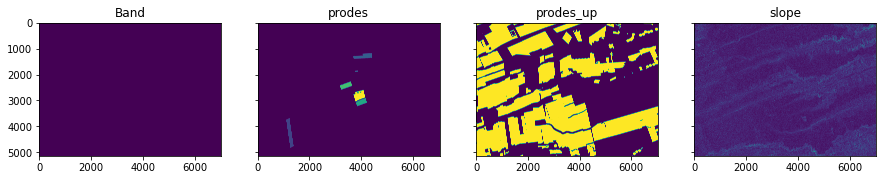

In [ ]:
# Plotting the reference data.
fig, (ax0, ax1, ax2, ax3) = plt.subplots(1,4, sharey=True)

fig.set_figwidth(15)

ax0.imshow(band)
ax0.set_title('Band')

ax1.imshow(prodes)
ax1.set_title('prodes')
    
ax2.imshow(prodes_up)
ax2.set_title('prodes_up')
ax3.imshow(slope)
ax3.set_title('slope')

plt.show()

## 4. Samples Deforestation

In [ ]:
# Get unique polygons. The raster was previously created, write one unique number 
# for each polygon. The noData value is 0.
unique, counts = np.unique(prodes, return_counts=True)
unique.shape

(7,)

In [ ]:
# Substitute the original numbers to sequential numbers in the form range(0,n,1), 
# where n is the total of unique values.
print(unique.shape, counts.shape)

(7,) (7,)


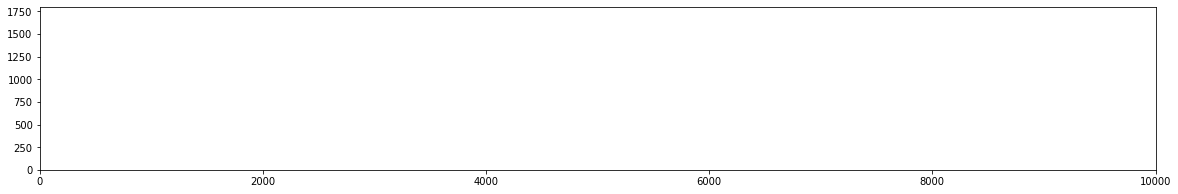

In [ ]:
# Plotting a graph with the number of series available per deforestation polygon.
plt.figure(figsize=(20,3))
plt.plot(range(1,len(counts)), counts[1:], linewidth=.3)
plt.ylim(0,number_pixels)
plt.xlim(0,10000)
plt.show()

In [ ]:
# Calculating the total of deforestation samples.
counts_copy = counts.copy()
counts_copy[counts>number_pixels] = number_pixels
total = np.sum(counts_copy[1:])
print('Half number of samples:', total)

Half number of samples: 10800


In [ ]:
# Randomly select the samples.
ind_def = np.zeros([total,2], dtype=np.int)
num = 0

for i in tqdm(unique[1:]):
    ind_i, ind_j = np.where(prodes==i)
    
    if len(ind_i)<number_pixels:
        rng = np.random.default_rng()
        indexes = rng.choice(len(ind_i), size=len(ind_i), replace=False)
        
    else:
        rng = np.random.default_rng()
        indexes = rng.choice(len(ind_i), size=number_pixels, replace=False)
        
    for ii in indexes:
        ind_def[num,0] = ind_i[ii]
        ind_def[num,1] = ind_j[ii]
        num += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


  0%|          | 0/6 [00:00<?, ?it/s]

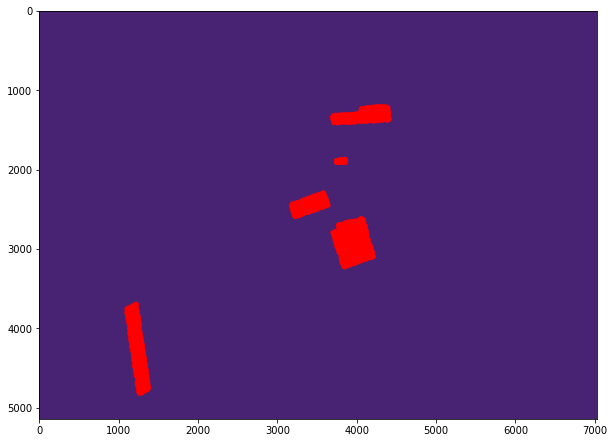

In [ ]:
# Plotting the locations of deforestation training samples over the reference band.
plt.figure(figsize=(10,10))
plt.imshow(band, vmin=-50, vmax=3000)
plt.plot(ind_def[:,1], ind_def[:,0], '.r')
plt.show()

## 5. Samples not Deforestation

In [ ]:
# Plotting slope reference data.
slope[band==data.GetRasterBand(1).GetNoDataValue()]  = None
slope[prodes!=0]        = None
slope[prodes_up==1]     = None

plt.imshow(slope)
plt.show()

In [ ]:
# Creating the slope classes.
# 0-4
# 4-6
# 6+

slope_ref = slope.copy()

cut = slope<4
slope_ref[cut] = -3

cut = slope>=4
cut = cut * (slope<6)
slope_ref[cut] = -2

cut = slope>=6
slope_ref[cut] = -1

slope_ref = slope_ref + 4

In [ ]:
# Histogram for the number of pixels in each class.
plt.hist(slope_ref.ravel())
plt.show()

In [ ]:
# Getting the classes.
slope_ref[np.isnan(slope_ref)] = 0
unique, counts = np.unique(slope_ref, return_counts=True)
unique, counts

In [ ]:
# Number of pixels in each slope class.
number_pixels = int(total/(len(unique)-1))
print('Number of pixels for each class:', number_pixels)

In [ ]:
# Randomly select the natural vegetation samples.
ind_not_def = np.zeros([number_pixels*(len(unique)-1),2], dtype=np.int)
num = 0

for i in tqdm(range(1, len(unique))):
    ind_i, ind_j = np.where(slope_ref==i)
    
    if len(ind_i)<number_pixels:
        rng = np.random.default_rng()
        indexes = rng.choice(len(ind_i), size=len(ind_i), replace=False)
        
    else:
        rng = np.random.default_rng()
        indexes = rng.choice(len(ind_i), size=number_pixels, replace=False)
        
    for ii in indexes:
        ind_not_def[num,0] = ind_i[ii]
        ind_not_def[num,1] = ind_j[ii]
        num += 1

In [ ]:
# Plotting the location of natural vegetation training samples.
plt.figure(figsize=(10,10))
plt.imshow(band, vmin=-50, vmax=3000)
plt.plot(ind_not_def[:,1], ind_not_def[:,0], '.r')
plt.show()

In [ ]:
# Difference between the number of deforestation and natural vegetation samples.

total-num

## 6. Merge the Samples Indices

In [ ]:
# Merging the deforestation and natural vegetation samples indices in the same array.

samples_ind = np.zeros([len(ind_def)+len(ind_not_def), 3], dtype=np.int)

samples_ind[:len(ind_def), 0] = ind_def[:,0]
samples_ind[:len(ind_def), 1] = ind_def[:,1]
samples_ind[:len(ind_def), 2] = [1]*len(ind_def)

samples_ind[len(ind_def):, 0] = ind_not_def[:,0]
samples_ind[len(ind_def):, 1] = ind_not_def[:,1]
samples_ind[len(ind_def):, 2] = [0]*len(ind_not_def)

print(samples_ind[-1,:], '\n')

np.random.shuffle(samples_ind)
np.random.shuffle(samples_ind)
print(samples_ind[-10:])

Populating...

## 7. Populate Series

In [ ]:
# Acquiring the pixel time series for the training samples.

t1 = time.time()

if platform == 'Sentinel':
    cubes = ['band2', 'band3', 'band4', 'band8a', 'band11', 'band12', 'NDVI', 'EVI']
elif platform == 'Landsat':
    cubes = ['band2', 'band3', 'band4', 'band5', 'band6', 'band7', 'NDVI', 'EVI']

cube = gdal.Open(path_band)

samples = np.zeros([len(samples_ind), cube.RasterCount, len(cubes)], dtype=np.float32)

for cube_ind in range(len(cubes)):
    print('---- Populate '+cubes[cube_ind]+' ----')
    cube_path = f'./cubes/filled/{str(year)}.{cell}.{cubes[cube_ind]}.tif'
    cube = gdal.Open(cube_path).ReadAsArray()
    
    ii = 0
    for i,j,k in tqdm(samples_ind):
        samples[ii, :, cube_ind] = cube[:,i,j]/10000
        ii += 1
        
    del cube
    
print('---- Done! ----')
t2 = time.time()
print('Elapsed time: %.3f minutes' % ((t2-t1)/60))

In [ ]:
# Plotting some of the training samples. 0 is natural deforestation and 1 is deforestation.

f, ax = plt.subplots(ncols=10, sharey=True)
f.set_figwidth(20)
f.set_figheight(10)

for i in range(10):
    ax[i].imshow(samples[i,:,:], vmin=0, vmax=.8, interpolation='nearest')
    ax[i].title.set_text(str(samples_ind[i,2]))

plt.show()

Saving the samples.

In [ ]:
# Saving the training samples in a file. The reference values for the samples
# are saved in a separate file.
os.makedirs('./training_samples/LSTM')

date = datetime.datetime.today()

np.save(f'./training_samples/LSTM/{samples_id}.{year}.samples.npy', samples)
np.save(f'./training_samples/LSTM/{samples_id}.{year}.truth.npy', samples_ind[:,2])

In [ ]:
# printing the path to the created training samples.
print('Saved in: ', f'./training_samples/LSTM/{samples_id}.{year}.samples.npy')
print('Saved in: ', f'./training_samples/LSTM/{samples_id}.{year}.truth.npy')

## END